In [1]:
# Import libraries.
%matplotlib notebook
import pandas as pd

In [3]:
# Load data.
rnd = pd.read_csv('out_random_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Random'])
one = pd.read_csv('out_one_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Criterion_product'])
two = pd.read_csv('out_two_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Criterion_sum'])
three = pd.read_csv('out_three_edges_all.txt', sep='\t', usecols=[0, 1], header=0, names=['Edge', 'Criterion_formula'])

#one.head()

In [4]:
# Join data.
df = pd.merge(rnd, one, how='right', on='Edge')
df = df.merge(two, how='right', on='Edge')
df = df.merge(three, how='right', on='Edge')

<IPython.core.display.Javascript object>


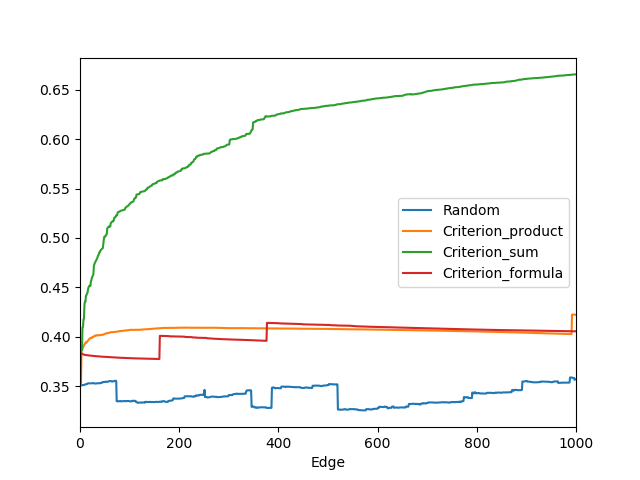

In [5]:
# Plot.
df.plot(x =0, y=[1,2,3,4])

<IPython.core.display.Javascript object>


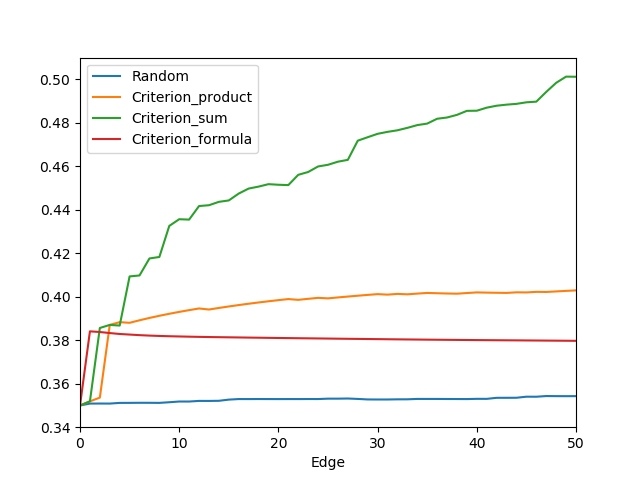

In [6]:
# Plot.
df.plot(x =0, y=[1,2,3,4], xlim=(0,50), ylim=(0.34,0.51))

In [19]:
# Load edges.
random_edges = pd.read_csv('out_random_edges.txt', sep='\t', names=['R_sources', 'R_targets'])
print("---RANDOM EDGES---")
print("Unique Sources: ", random_edges['R_sources'].nunique())
print("Unique Targets: ", random_edges['R_targets'].nunique())
print("Average targets per source", random_edges.groupby('R_sources').count().mean())
print("Average sources per target", random_edges.groupby('R_targets').count().mean())

---RANDOM EDGES---
Unique Sources:  679
Unique Targets:  688
Average targets per source R_targets    1.472754
dtype: float64
Average sources per target R_sources    1.453488
dtype: float64


In [21]:
print("---PRODUCT EDGES---")
one_edges = pd.read_csv('out_one_edges.txt', sep='\t', names=['1_sources', '1_targets'])
print("Unique Sources: ", one_edges['1_sources'].nunique())
print("Unique Targets: ", one_edges['1_targets'].nunique())
print("Average targets per source", one_edges.groupby('1_sources').count().mean())
print("Average sources per target", one_edges.groupby('1_targets').count().mean())

---PRODUCT EDGES---
Unique Sources:  3
Unique Targets:  532
Average targets per source 1_targets    333.333333
dtype: float64
Average sources per target 1_sources    1.879699
dtype: float64


In [23]:
print("---SUM EDGES---")
two_edges = pd.read_csv('out_two_edges.txt', sep='\t', names=['2_sources', '2_targets'])
print("Unque Sources: ", two_edges['2_sources'].nunique())
print("Unique Targets: ", two_edges['2_targets'].nunique())
print("Average targets per source: ", two_edges.groupby("2_sources").count().mean())
print("Average sources per target: ", two_edges.groupby("2_targets").count().mean())

---SUM EDGES---
Unque Sources:  960
Unique Targets:  5
Average targets per source:  2_targets    1.041667
dtype: float64
Average sources per target:  2_sources    200.0
dtype: float64


In [26]:
print("---FORMULA EDGES---")
three_edges = pd.read_csv('out_three_edges.txt', sep ='\t', names=['3_sources', '3_targets'])
print('Unique Sources: ', three_edges['3_sources'].nunique())
print('UNique Targets: ', three_edges['3_targets'].nunique())
print('Average targets per source: ', three_edges.groupby('3_sources').count().mean())
print('Average source per target: ', three_edges.groupby('3_targets').count().mean())

---FORMULA EDGES---
Unique Sources:  3
UNique Targets:  444
Average targets per source:  3_targets    333.333333
dtype: float64
Average source per target:  3_sources    2.252252
dtype: float64


In [78]:
top_pg = pd.read_csv('out_top_by_pagerank.txt', sep = '\t')
top_pg['Value'].nunique()

930

In [79]:
top_pg.shape

(1000, 2)

In [80]:
top_pg.head()

,Edge,Value
0,716,0.024491
1,739,0.023945
2,733,0.017688
3,812,0.016807
4,755,0.016632


In [81]:
dp = top_pg.groupby('Value', as_index=False).count()

In [93]:
dp.sort_values(by='Edge', ascending=False)

,Value,Edge
120,0.000252,8
208,0.000270,7
38,0.000242,6
71,0.000245,4
268,0.000284,4
...,...,...
334,0.000309,1
335,0.000309,1
336,0.000309,1
337,0.000310,1


In [94]:
dp.sort_values(by='Value', ascending=False).head(30)

,Value,Edge
929,0.024491,1
928,0.023945,1
927,0.017688,1
926,0.016807,1
925,0.016632,1
924,0.016453,1
923,0.014510,1
922,0.013222,1
921,0.012537,1
920,0.011303,1


In [84]:
dp.loc[dp["Edge"] == 1].describe()

,Value,Edge
count,894.000000,894.0
mean,0.001028,1.0
std,0.002140,0.0
min,0.000237,1.0
25%,0.000280,1.0
50%,0.000413,1.0
75%,0.000853,1.0
max,0.024491,1.0


In [85]:
dp.loc[dp['Edge'] > 1].describe()

,Value,Edge
count,36.000000,36.000000
mean,0.000274,2.944444
std,0.000068,1.472499
min,0.000238,2.000000
25%,0.000242,2.000000
50%,0.000247,2.000000
75%,0.000277,3.250000
max,0.000559,8.000000


In [86]:
top_redabs = pd.read_csv('out_top_by_redabsprobs.txt', sep='\t')
top_redabs.head()

,Edge,Value
0,268,0.614635
1,30,0.609787
2,1157,0.600826
3,135,0.595166
4,370,0.594164


In [87]:
top_redabs['Value'].nunique()

735

In [88]:
dr = top_redabs.groupby('Value', as_index=False).count()
dr.sort_values(by='Edge', ascending=False)

,Value,Edge
206,0.297510,121
307,0.447510,51
647,0.553330,32
195,0.252883,14
95,0.172861,7
...,...,...
256,0.393030,1
257,0.393572,1
258,0.394867,1
259,0.398173,1


In [89]:
dr.sort_values(by='Value', ascending=False).head(30)

,Value,Edge
734,0.614635,1
733,0.609787,1
732,0.600826,1
731,0.595166,1
730,0.594164,1
729,0.589634,1
728,0.589344,1
727,0.588497,1
726,0.588236,1
725,0.588222,1


In [90]:
dr.loc[dr['Edge'] == 1].describe()

,Value,Edge
count,709.000000,709.0
mean,0.412125,1.0
std,0.151572,0.0
min,0.160915,1.0
25%,0.217795,1.0
50%,0.485149,1.0
75%,0.531799,1.0
max,0.614635,1.0


In [91]:
dr.loc[dr['Edge'] > 1].describe()

,Value,Edge
count,26.000000,26.000000
mean,0.334269,11.192308
std,0.158791,24.907861
min,0.163144,2.000000
25%,0.185456,2.000000
50%,0.275196,3.000000
75%,0.519822,6.000000
max,0.553330,121.000000
